# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [6]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()
#cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
#tables = cursor.fetchall()
cursor.execute("SELECT* FROM Products;")

In [8]:
rows = cursor.fetchall()
headers = cursor.description
header_list = []
for header in headers:
    header_list.append(header[0])
    print(header[0])



ProductID
ProductName
SupplierID
CategoryID
Unit
Price


In [9]:
print(header_list)

['ProductID', 'ProductName', 'SupplierID', 'CategoryID', 'Unit', 'Price']


### Question 1 : Total Products Less than €10

How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [10]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) AS price_under_10
    FROM Products
    WHERE price < 10
""")

rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [103]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS supplier_count
    FROM Suppliers 
    GROUP BY Country 
    ORDER BY supplier_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
country_by_supplier = cursor.fetchall()
print(country_by_supplier)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


In [104]:
print(country_by_supplier)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


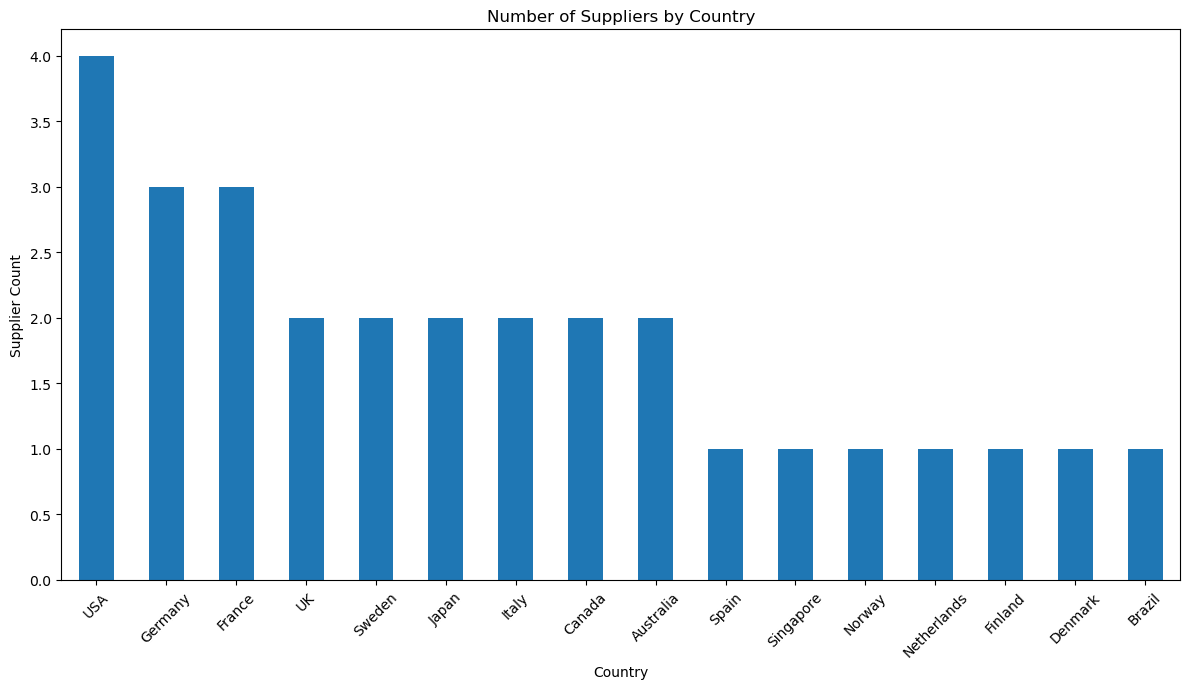

In [106]:
# TODO: Convert your list of tuples to a dataframe
#data = [
    #('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2),
    #('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2),
    #('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1),
    #('Finland', 1), ('Denmark', 1), ('Brazil', 1)
#]

df = pd.DataFrame(country_by_supplier, columns=['Country', 'Count'])

# TODO: Generate a visualization on this dataframe

df.set_index('Country', inplace=True)
df.plot(kind='bar', figsize=(12, 7), legend=False)
plt.title('Number of Suppliers by Country')
plt.xlabel('Country')
plt.ylabel('Supplier Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [14]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT Country, COUNT(*) AS country_count
    FROM Customers 
    GROUP BY Country 
    ORDER BY country_count DESC;
""")

# TODO: Fetch your list of tuples and print it out
country_count_cust = cursor.fetchall()
print(country_count_cust)

[('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), ('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), ('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), ('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]


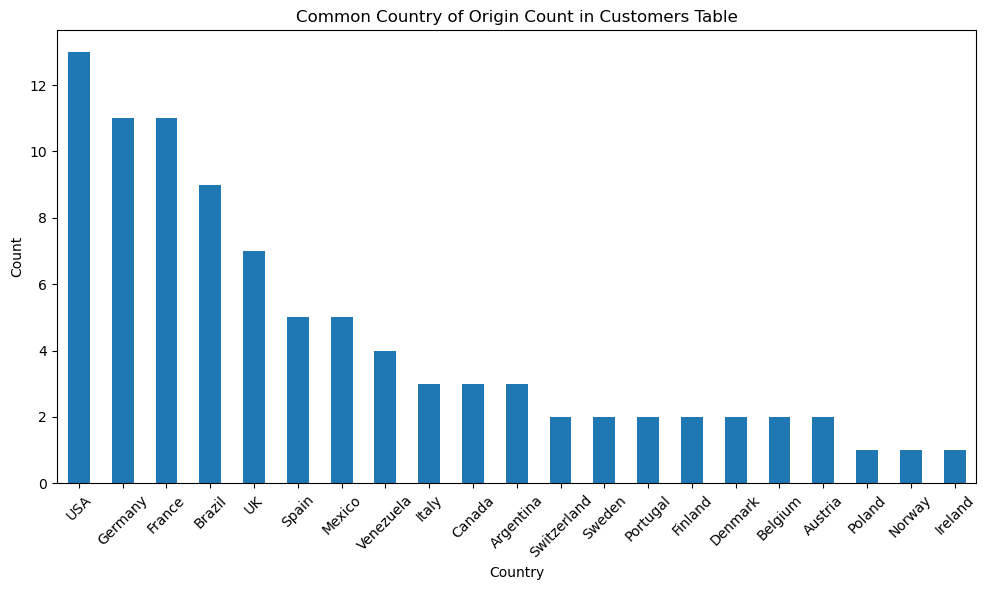

In [101]:
# TODO: Convert your list of tuples to a dataframe
#country_cust_data = [('USA', 13), ('Germany', 11), ('France', 11), ('Brazil', 9), ('UK', 7), 
        #('Spain', 5), ('Mexico', 5), ('Venezuela', 4), ('Italy', 3), ('Canada', 3), 
        #('Argentina', 3), ('Switzerland', 2), ('Sweden', 2), ('Portugal', 2), ('Finland', 2), 
        #('Denmark', 2), ('Belgium', 2), ('Austria', 2), ('Poland', 1), ('Norway', 1), ('Ireland', 1)]

df = pd.DataFrame(country_count_cust, columns=['Country', 'Count'])

# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(country_count_cust, columns=['Country', 'Count'])
df.set_index('Country', inplace=True)

df.plot.bar(figsize=(10, 6), legend=False)

plt.title('Common Country of Origin Count in Customers Table')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [28]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT
      Products.ProductName,
               SUM(OrderDetails.Quantity) AS total_quantity
FROM 
    OrderDetails 
Left Join
    Products 
ON 
    OrderDetails.ProductID = Products.ProductID 
GROUP BY
    Products.ProductName 
ORDER BY
    total_quantity ASC
LIMIT 20;
    
""")

# TODO: Fetch your list of tuples and print it out
least_pop_prod_data = cursor.fetchall()
print(least_pop_prod_data)


[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ('Genen Shouyu', 25), ("Uncle Bob's Organic Dried Pears", 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Louisiana Hot Spiced Okra', 90), ('Schoggi Schokolade', 90)]


In [29]:
print(len(rows))

20


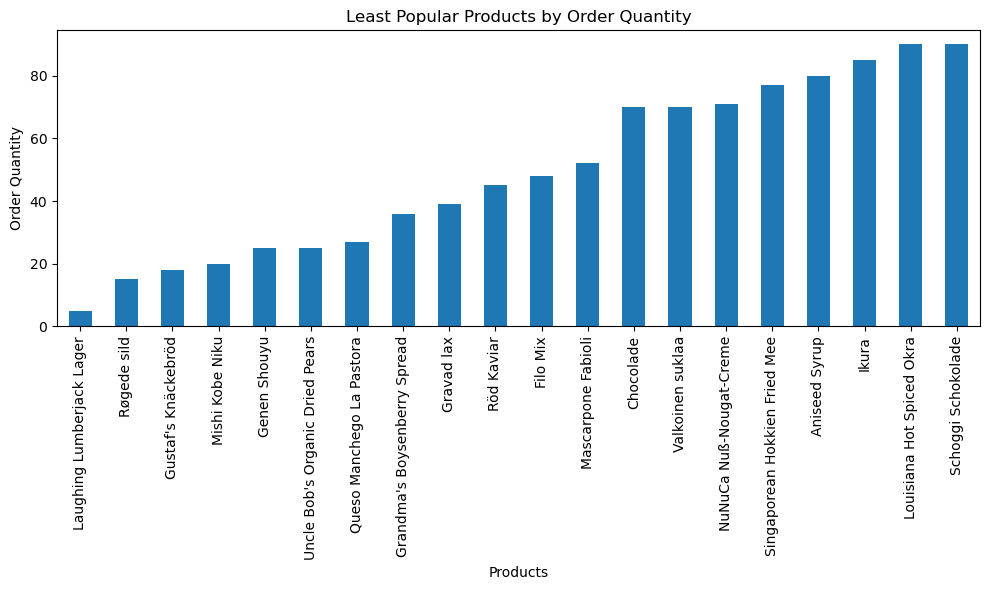

In [100]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(least_pop_prod_data, columns=['Products', 'Order Quantity'])

# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(least_pop_prod_data, columns=['Products', 'Order Quantity'])
df.set_index('Products', inplace=True)

df.plot.bar(figsize=(10, 6), legend=False)

plt.title('Least Popular Products by Order Quantity')
plt.xlabel('Products')
plt.ylabel('Order Quantity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [66]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT
    Products.ProductName,
    SUM(OrderDetails.Quantity * Products.Price) AS total_revenue
FROM
    OrderDetails
LEFT JOIN
    Products
ON 
    OrderDetails.ProductID = Products.ProductID 
GROUP BY
    Products.ProductID, Products.ProductName
ORDER BY
    total_revenue ASC;
      
""")

# TODO: Fetch your list of tuples and print it out
least_pop_total_rev = cursor.fetchall()
print(least_pop_total_rev)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5), ("Jack's New England Clam Chowder", 1341.35), ('Original Frankfurter grüne Soße', 1404), ("Sir Rodney's Scones", 1470), ('Tunnbröd', 1485), ('Louisiana Hot Spiced Okra', 1530), ('Sasquatch Ale', 1540), ('Mascarpone Fabioli', 1664), ('Teatime Chocolate Biscuits', 1665.2), ('Spegesild', 1740), ('Longlife Tofu', 1860), ('Mishi Kobe Niku', 1940), ('Escargots de Bourgogne', 2053.75), ('Tourtière', 2086.0), ("Chef Anton's Cajun S

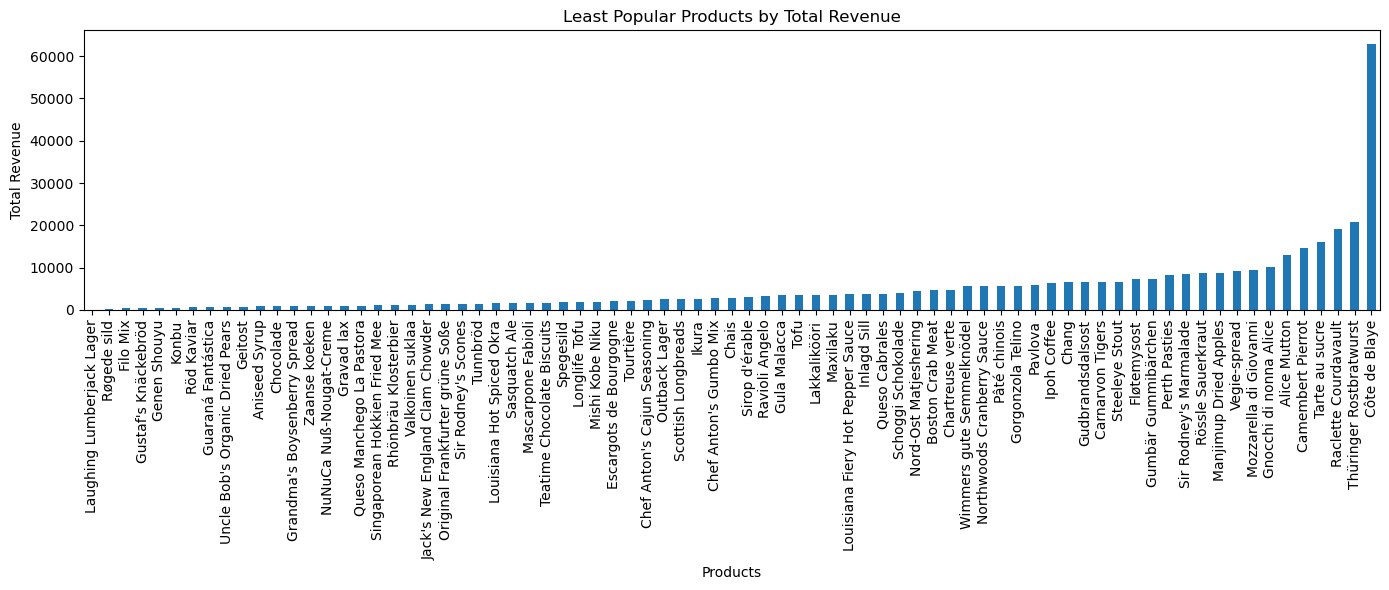

In [110]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(least_pop_total_rev, columns=['ProductName', 'total_revenue'])

# TODO: Generate a visualization on this dataframe

df = pd.DataFrame(least_pop_total_rev, columns=['ProductName', 'total_revenue'])
df.set_index('ProductName', inplace=True)

df.plot.bar(figsize=(14, 6), legend=False)

plt.title('Least Popular Products by Total Revenue')
plt.xlabel('Products')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [76]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT
    Customers.Country,
    COUNT(Orders.OrderID) AS TotalOrders
FROM
    Orders
JOIN
    Customers ON Orders.CustomerID = Customers.CustomerID
GROUP BY
    Customers.Country
      
""")

# TODO: Fetch your list of tuples and print it out
countries_most_orders = cursor.fetchall()
print(countries_most_orders)

[('Argentina', 1), ('Austria', 13), ('Belgium', 2), ('Brazil', 19), ('Canada', 9), ('Denmark', 4), ('Finland', 8), ('France', 18), ('Germany', 25), ('Ireland', 6), ('Italy', 7), ('Mexico', 9), ('Norway', 1), ('Poland', 1), ('Portugal', 5), ('Spain', 7), ('Sweden', 7), ('Switzerland', 4), ('UK', 12), ('USA', 29), ('Venezuela', 9)]


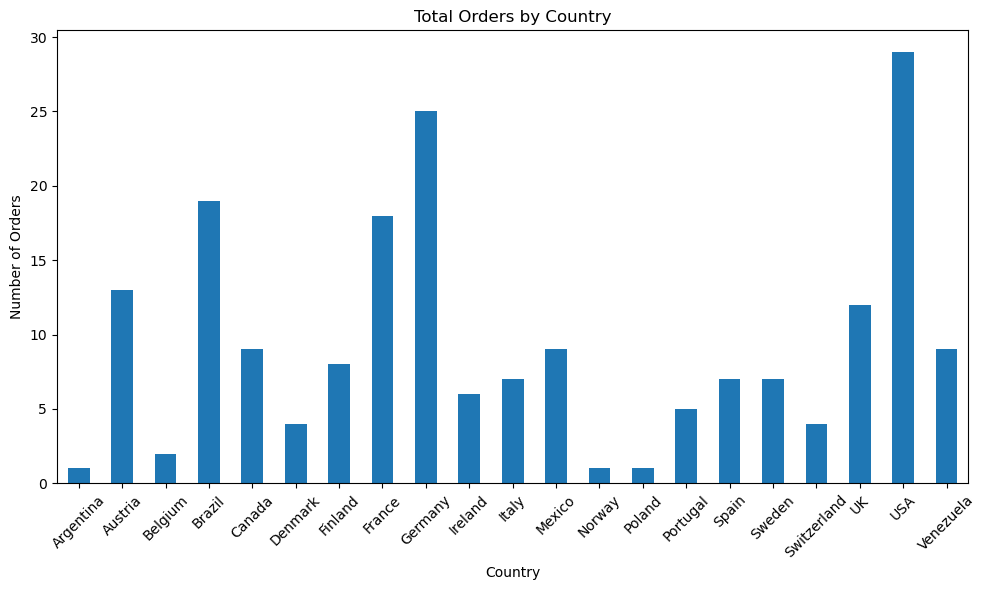

In [98]:
# TODO: Convert your list of tuples to a dataframe

df = pd.DataFrame(countries_most_orders, columns = ['Country', 'Orders'])

# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(countries_most_orders, columns = ['Country', 'Orders'])

df.set_index('Country', inplace=True)

df.plot.bar(figsize=(10, 6), legend=False)
plt.title('Total Orders by Country')
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [83]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT 
    Customers.Country,
    COUNT(Customers.CustomerID)
FROM 
    Customers
LEFT JOIN 
    Orders ON Customers.CustomerID = Orders.CustomerID
WHERE 
    Orders.OrderID IS NULL
GROUP BY 
    Customers.Country
ORDER BY 
    COUNT(Customers.CustomerID) 
      
""")

# TODO: Fetch your list of tuples and print it out
countries_cust_no_order = cursor.fetchall()
print(countries_cust_no_order)

[('Belgium', 1), ('Canada', 1), ('Spain', 1), ('UK', 1), ('Argentina', 2), ('Germany', 2), ('France', 4), ('USA', 5)]


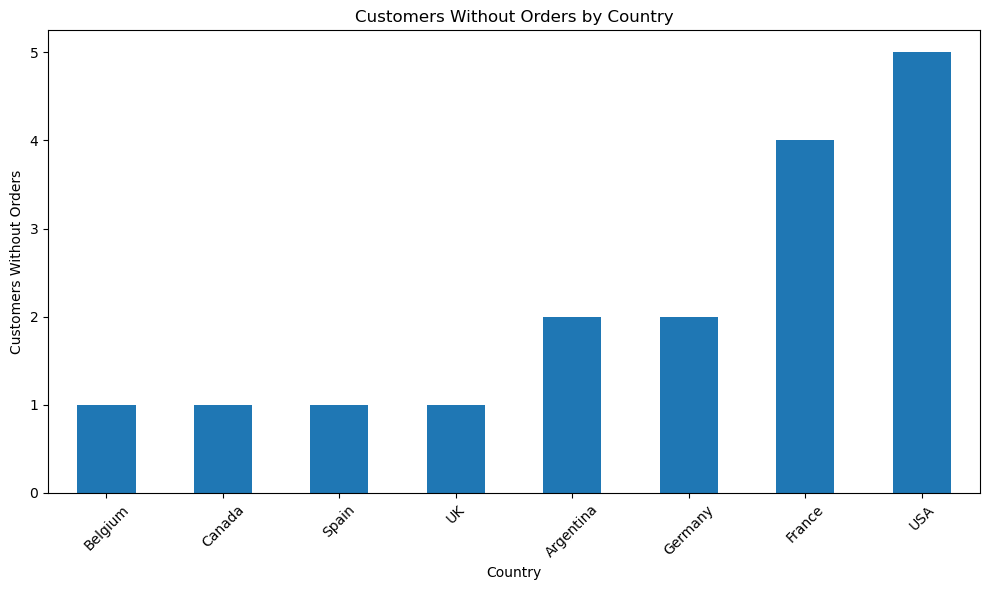

In [97]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(countries_cust_no_order, columns = ['Country', 'Customers Without Orders'])

# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(countries_cust_no_order, columns = ['Country', 'Customers Without Orders'])
df.set_index('Country', inplace=True)
df.plot.bar(figsize=(10, 6), legend=False)
plt.title('Customers Without Orders by Country')
plt.xlabel('Country')
plt.ylabel('Customers Without Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [92]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
SELECT 
    Suppliers.SupplierName,
    COUNT(OrderDetails.OrderID) AS OrderCount
FROM 
    Suppliers
JOIN 
    Products ON Suppliers.SupplierID = Products.SupplierID
JOIN 
    OrderDetails ON Products.ProductID = OrderDetails.ProductID
GROUP BY 
    Suppliers.SupplierName
ORDER BY 
    OrderCount DESC;
      
""")

# TODO: Fetch your list of tuples and print it out
most_pop_suppliers_oc= cursor.fetchall()
print(most_pop_suppliers_oc)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


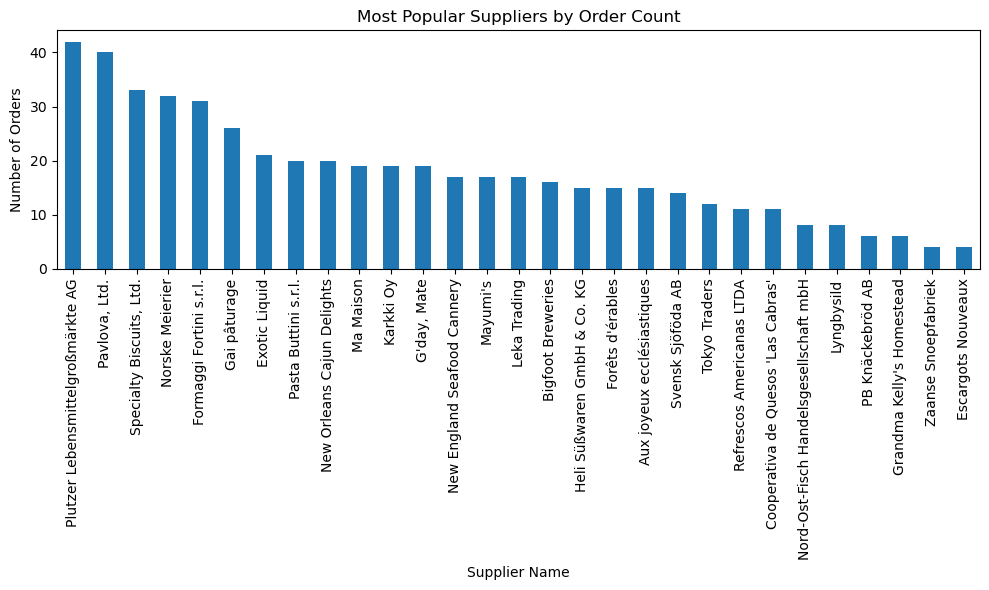

In [96]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(most_pop_suppliers_oc, columns=['SupplierName', 'OrderCount'])

# TODO: Generate a visualization on this dataframe
df = pd.DataFrame(most_pop_suppliers_oc, columns=['SupplierName', 'OrderCount'])
df.set_index('SupplierName', inplace=True)
df.plot(kind='bar', figsize=(10, 6), legend=False)
plt.title('Most Popular Suppliers by Order Count')
plt.xlabel('Supplier Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

- The United States has the greatest number of customers. This correlates with the number of suppliers by country because as we can see by the bar graph the United States also has the greatest number of suppliers. 

### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

- The least popular product by order quantity is Laughing Lumberjack Lager. This correlates with revenue because when we compare the graphs titled "Least Popular Products by Total Revenue" and "Least Popular Products by Order Quantity" we can see that the product Laughing Lumberjack Lager also has the least revenue.

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

- The United States has the highest number of orders, with 29 in total. It also has the greatest number of customers who have not placed any orders, approximately 5. This suggests a correlation where countries with more customers placing orders also tend to have a higher number of customers who do not order.

### Question 4

Which supplier has the most orders? Which evidence supports your answer?
- The supplier that has the most orders is Plutzer Lebensmittelgroßmärkte AG with an order count of 42.

